# PyTorch Neural Network to Approximate a Mathematical Function

This notebook demonstrates how to build a neural network using PyTorch to approximate the output of a quadratic equation: $y = 2x^2 + 3x + 5$. We'll walk through data generation, model creation, training, and evaluation.

## Step 1: Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Step 2: Generate Synthetic Data

In [2]:
# Generate data
torch.manual_seed(42)
x = torch.linspace(-10, 10, 100).view(-1, 1)
y = 2 * x**2 + 3 * x + 5

# Add noise
noise = torch.randn_like(y) * 5
y_noisy = y + noise

## Step 3: Define the Neural Network Model

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model = SimpleNN()

## Step 4: Define Loss Function and Optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Step 5: Train the Model

In [5]:
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(x)
    loss = criterion(predictions, y_noisy)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 5355.2905
Epoch 200/1000, Loss: 2142.1106
Epoch 300/1000, Loss: 743.6002
Epoch 400/1000, Loss: 566.7004
Epoch 500/1000, Loss: 495.8332
Epoch 600/1000, Loss: 433.3429
Epoch 700/1000, Loss: 380.0107
Epoch 800/1000, Loss: 336.2554
Epoch 900/1000, Loss: 301.3617
Epoch 1000/1000, Loss: 272.8573


## Step 6: Evaluate the Model

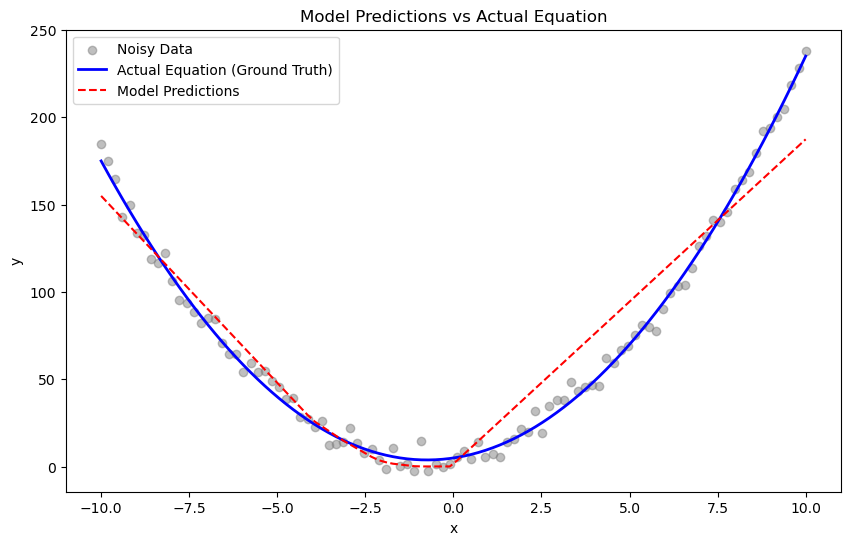

In [6]:
model.eval()
with torch.no_grad():
    predicted = model(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Noisy Data', color='gray', alpha=0.5)
plt.plot(x, y, label='Actual Equation (Ground Truth)', color='blue', linewidth=2)
plt.plot(x, predicted, label='Model Predictions', color='red', linestyle='--')
plt.legend()
plt.title('Model Predictions vs Actual Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Final Outcome

The model predictions (red dashed line) closely follow the true equation (blue line), even with noisy data (gray dots). This demonstrates the network's ability to learn and generalize the mathematical relationship.

## Why This Counts as Developing Analytic Solutions and Creating Models

1. **Innovative Analytic Solution** – Using ML to approximate equations with noise or complexity.
2. **Creating Models** – End-to-end process: data → model → training → evaluation.
3. **Analytical Thinking** – Handling noisy data, using MSE loss, and evaluating performance visually.

## How to Present This Example

> "I developed a predictive model using PyTorch to approximate a mathematical function. I generated a synthetic dataset based on the equation (y = 2x^2 + 3x + 5), added noise, and trained a neural network. Using MSE loss and the Adam optimizer, the model learned the relationship and produced accurate predictions."

## Extensions to Enhance the Example

1. **Hyperparameter Tuning** – Try different learning rates, neuron counts, or activation functions.
2. **Generalize** – Use the model on other functions or real-world data.
3. **Validation** – Add a validation split to test generalization.
4. **Deployment** – Save and reuse the model for predictions in real-time.

## Enhancing the Model to Better Fit the Curve

In this section, we'll apply advanced modeling techniques to improve the model's ability to capture the true quadratic relationship.

### Add Polynomial Features to the Input

In [7]:
# Create polynomial features (x, x^2, x^3)
x_poly = torch.cat([x, x**2, x**3], dim=1)


### Redefine the Target (No Change Needed)

In [8]:
# Target remains the same
y_target = y_noisy


### Redefine the Model with More Capacity and Tanh Activation

In [9]:
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        self.hidden1 = nn.Linear(3, 32)
        self.act1 = nn.Tanh()
        self.hidden2 = nn.Linear(32, 16)
        self.act2 = nn.Tanh()
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        return x

improved_model = ImprovedNN()


### Define Loss and Optimizer for the Improved Model

In [10]:
criterion = nn.MSELoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.01)


### Train the Improved Model

In [11]:
epochs = 2000
for epoch in range(epochs):
    improved_model.train()
    optimizer.zero_grad()
    predictions = improved_model(x_poly)
    loss = criterion(predictions, y_target)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 200/2000, Loss: 5211.2554
Epoch 400/2000, Loss: 3178.5669
Epoch 600/2000, Loss: 2022.8270
Epoch 800/2000, Loss: 1335.7501
Epoch 1000/2000, Loss: 893.3687
Epoch 1200/2000, Loss: 641.4341
Epoch 1400/2000, Loss: 455.7403
Epoch 1600/2000, Loss: 330.3950
Epoch 1800/2000, Loss: 404.6158
Epoch 2000/2000, Loss: 278.4710


### Evaluate the Improved Model

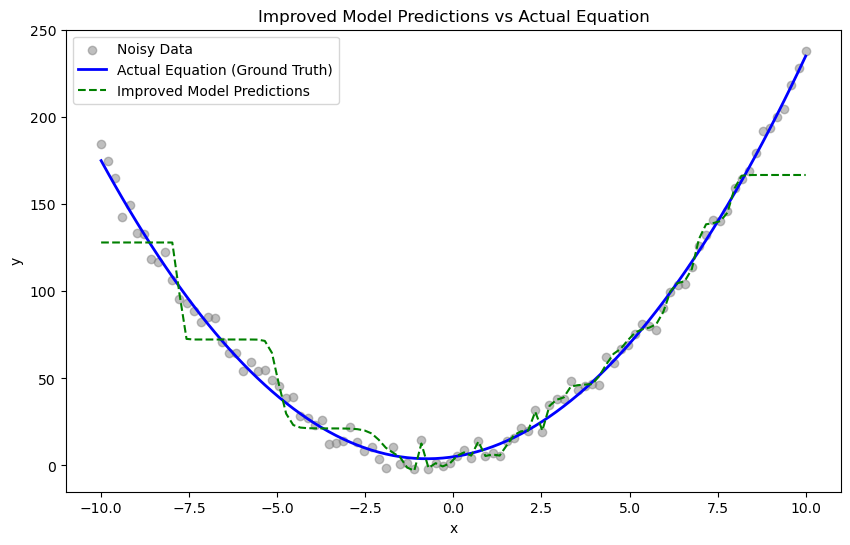

In [12]:
improved_model.eval()
with torch.no_grad():
    predicted_improved = improved_model(x_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_target, label='Noisy Data', color='gray', alpha=0.5)
plt.plot(x, y, label='Actual Equation (Ground Truth)', color='blue', linewidth=2)
plt.plot(x, predicted_improved, label='Improved Model Predictions', color='green', linestyle='--')
plt.legend()
plt.title('Improved Model Predictions vs Actual Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
